# The Data Science Process

<blockquote>Data science ins an interdisiplinary study of data whose central focus is the data life cycle and how data is applied to the decision making process.</blockquote>

1. Prepare the data (ETL, extract, transform, load)
    - Fractal process, applied on various scales (single program -> large scale enterprise level)
2. Build the model
3. Train the model
4. Analyse model results


## Preparation of Data

### The ETL Process

1. Extract - Get the data from the source 
2. Transform - Put the data into a tensor form
    - Here other transformations might be required as the data might not be available in the desired (eg. structured) format
3. Load - Put the data into an object to make it easily accessible
    - PyTorch provides us with the following abstract classes in order to achieve this task
        - DataSet
        - DataLoader -> wraps the dataset and provides access to the dataset
    - Access to data and quering capabilities

<blockquote>An abstract class is a Python class that has methods we must implement, so we can create a custom dataset by creating a subclass that extends the fucntionality of the Dataset class.</blockquote>

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms 

from torch.utils.data import Dataset

import numpy as np
import matplotlib.pyplot as plt

# print format
torch.set_printoptions(linewidth=120) 

In [5]:
# custom dataset class that extends Dataset and implements required methods
class OHLC(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csc_file)
        
    def __get__item(self,index):
        r = self.data.iloc[index]
        label = torch.tensor(r.is_up_day, dtype=torch.long)
        sample = self.normalize(torch.tensor([r.open, r.high, r.low, r.close]))
        return sample, label
    
    def __len__(self):
        return len(self.data)

In [39]:
# Download fashionMNIST dataset
# train set variable
train_set = torchvision.datasets.FashionMNIST(
    root='./Documents/data'
    ,train=True
    ,download=True # downloads it locally (checks existence beforehand)
    ,transform=transforms.Compose([
        transforms.ToTensor() # butilt in tensor transformer
    ])
)

# data loader variable with batch size = 10
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=40 # default size of batch size is 1
)

print('Balanced Dataset. \nDistribution ->',train_set.train_labels.bincount())

Balanced Dataset. 
Distribution -> tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


### Using the Data Loader to Show Data

Labels:  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6])


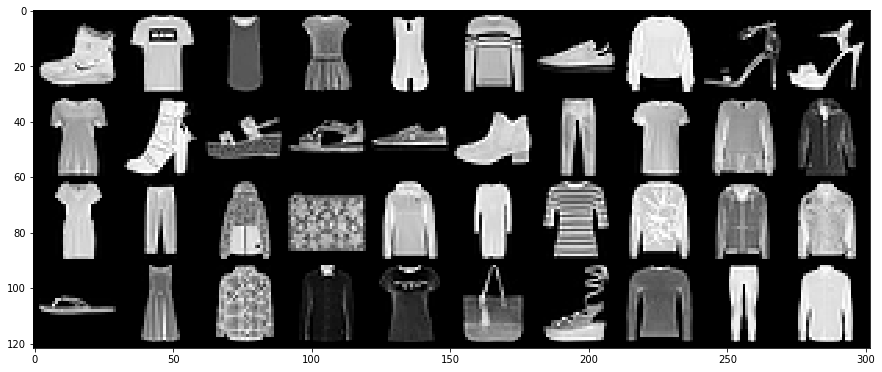

In [40]:
batch = next(iter(train_loader))

images, labels = batch
grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('Labels: ', labels)


### Object Oriented Neural Networks

- PyTorch models are created with OOP
- With OOP we orient our program design and structure around objects

<blockquote>Objects are defined in code using classes. A class defines the object's specification or spec, which specifies what data and code each object of the class should have.</blockquote>
- Classes encapsulate code and data
- All instances of a given class have two core components defined by the class
    1. Methods: represent the code (behavior of the object)
    2. Attributes: represent the data
- The torch.nn package is used to build neural networks in PyTorch
    - This library contains all the components needed to build a neural network
    - The base class here is Module which is extended by all other NN classes
    - Keeps track of weights and biases within each layer

<blockquote>When we pass a tensor to our network as input, the tensor flows forward through each layer transformation until the tensor reaches the output layer. This process of a tensor flowing forward through the network is known as a forward pass.</blockquote>

<blockquote>Each layer has its own transformation and the tensor passes forward through each layer's transformation. The composition of all the individual layer forward passes defines the overall forward pass transformation for the network itself.</blockquote>

#### The forward() Method

- Every PyTorch nn.Module has a forward() method, that represents the forward pass. The forward() method is what will implement the transformation of the network.

- PyTorch also provides mini NN operations which we can use in our class extension implementation 
- Since python is not compiling the code, it won't throw errors until the code is executed


#### Layers in a NN Architecture

- The layers of a NN in PyTorch are implemented in the abstract class of the nn.Module 
- Two types of parameters
    1. Hyperparameters: values which are choosen manually and arbitrarily. These are things like number of output channels, kernel channels, out channels and features.
        - kernel_size: sets the filter size (kernel and filter are interchangable)
        - out_channel: sets the number of filters (one filter produces one output channel)
            - Also sometimes called feature maps
        - out_features: sets the size of the output tensor
        - Arbitrarily setting the number of nodes in the NN layers
        
    2. Data dependent parameters: parameters with values that depend on the data
        - in_channels (first conv layer): sets the number of color channels in an image for ex.
        - in_features: also depend on data coming from the previous layer
        - Tensors need to be flattened before going into linear layers
        
<div>
<img src="params.png" width="500"/>
</div>

In [47]:
import torch.nn as nn

# A simple class
class Network(nn.Module): # extending nn.Module base class
    def __init__(self):
        super(Network, self).__init__() # initializing base class
        # prebuilt layers
        # 1 input channel, convolved by 6 different filters
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        # fully connected, or dense layers 
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # implement forward pass
        return self.layer(t)

In [48]:
neural_net = Network()

# Resources